In [53]:
#Imports the libraries and read the data files

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os, sys, email
import gensim
from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from string import punctuation
import timeit
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
start = timeit.default_timer()
import pandas as pd 

df = pd.DataFrame.from_csv('10K_sample.txt', sep='\t', header=0)

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


In [54]:
df[['state','content']].groupby('state').count().reset_index()

,state,content
0,Arizona,3742
1,Arkansas,393
2,Louisiana,947
3,Mississippi,661
4,Nevada,1216
5,New Mexico,666
6,Tennessee,2070
7,Wyoming,304


In [55]:
df['date'] = df['date'].astype('datetime64[ns]')

In [56]:
df.date.describe()

count                   10000
unique                    259
top       2016-10-27 00:00:00
freq                       85
first     2016-09-06 00:00:00
last      2017-05-22 00:00:00
Name: date, dtype: object

In [64]:
from collections import Counter

df.content = df.content.astype(str)
df['word_cnt'] = df.content.str.split().str.len()

In [65]:
df.word_cnt.describe()

count     10000.000000
mean        400.455500
std        1418.530202
min           1.000000
25%         142.000000
50%         273.000000
75%         529.000000
max      112891.000000
Name: word_cnt, dtype: float64

In [77]:
len(df[df['word_cnt']>1000])

317

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


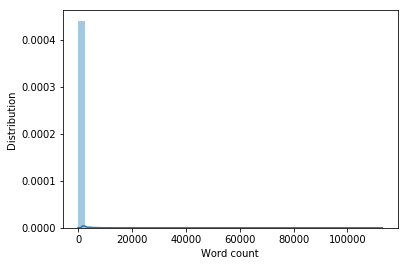

In [114]:
import seaborn as sns

ax = sns.distplot(df.word_cnt)
ax.set(xlabel='Word count', ylabel='Distribution')
plt.show()

In [116]:
df_filltered = df[(df['word_cnt']>0) & (df['word_cnt']<1000)]

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


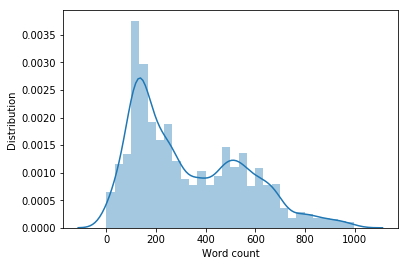

In [117]:
import seaborn as sns

ax = sns.distplot(df_filltered.word_cnt)
ax.set(xlabel='Word count', ylabel='Distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

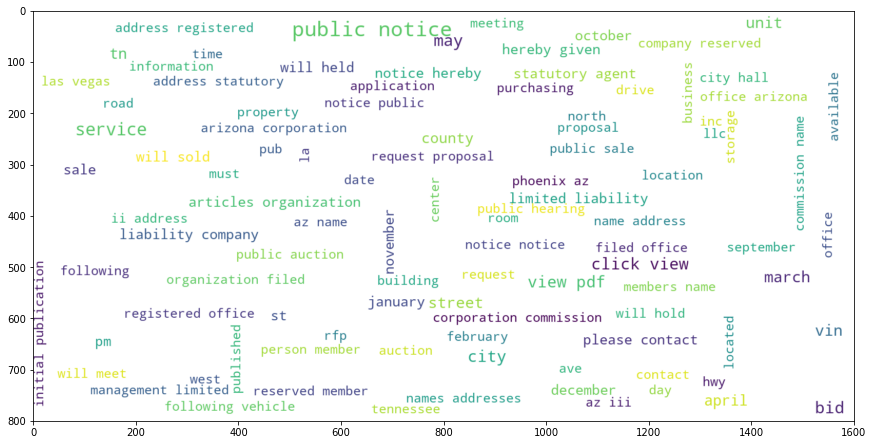

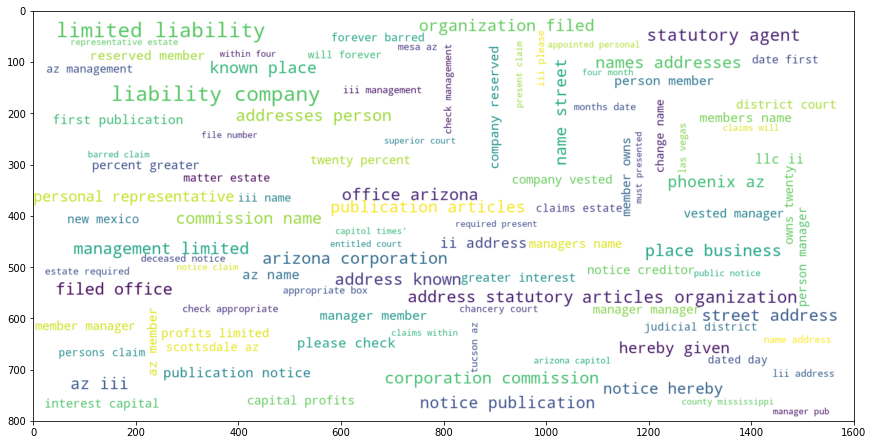

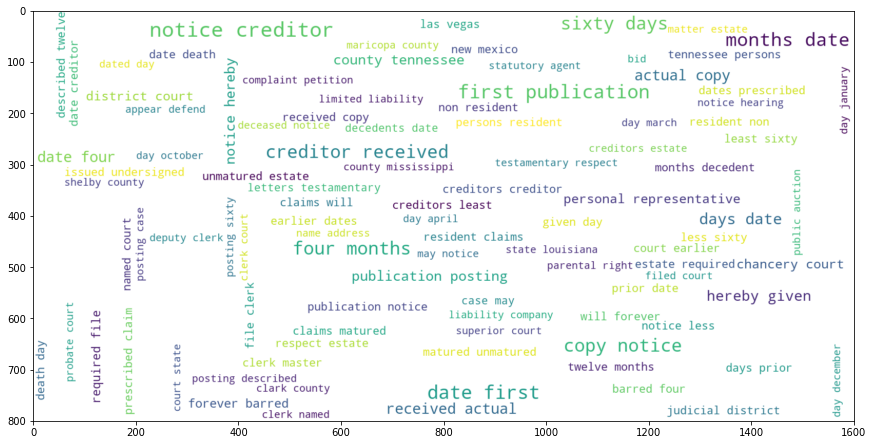

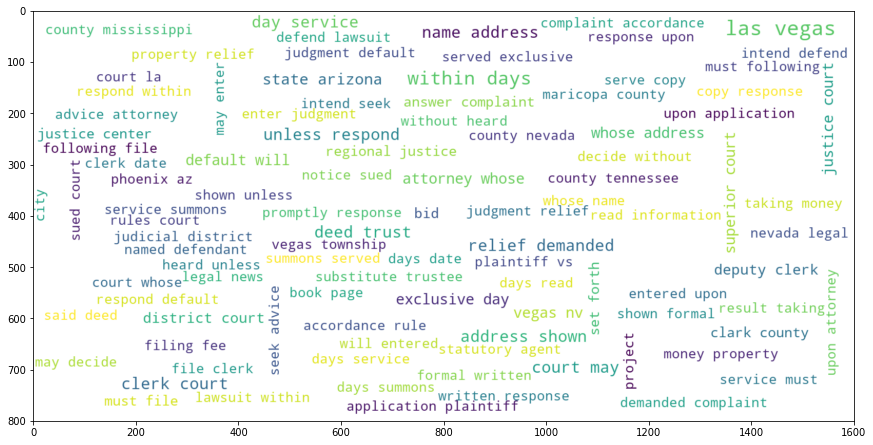

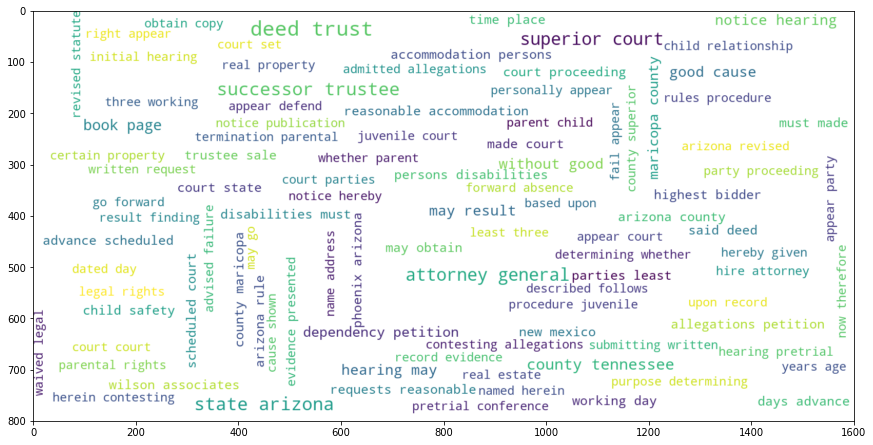

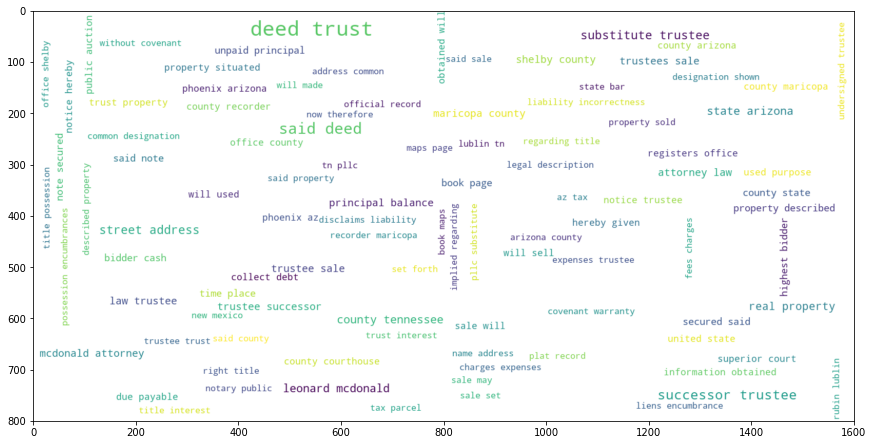

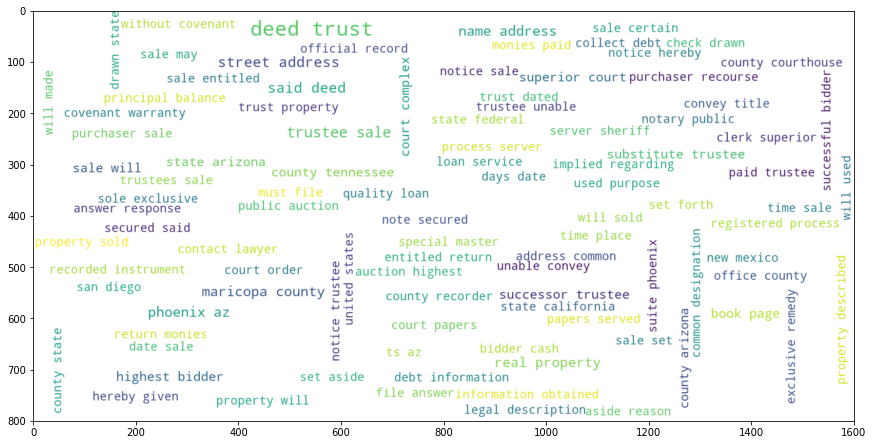

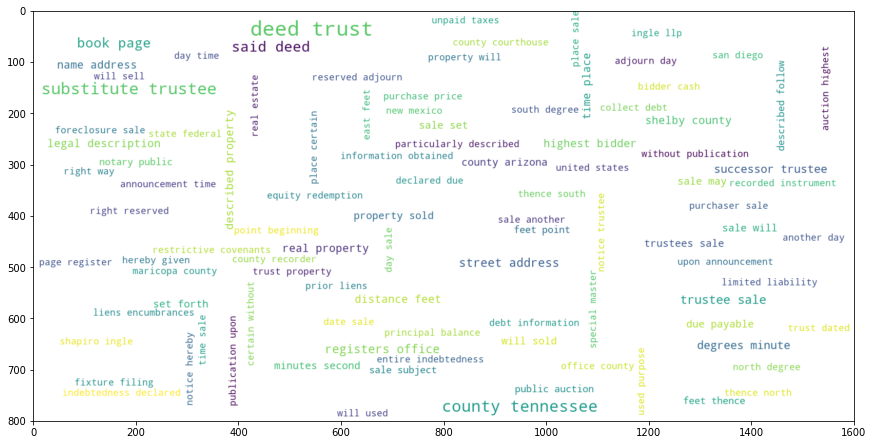

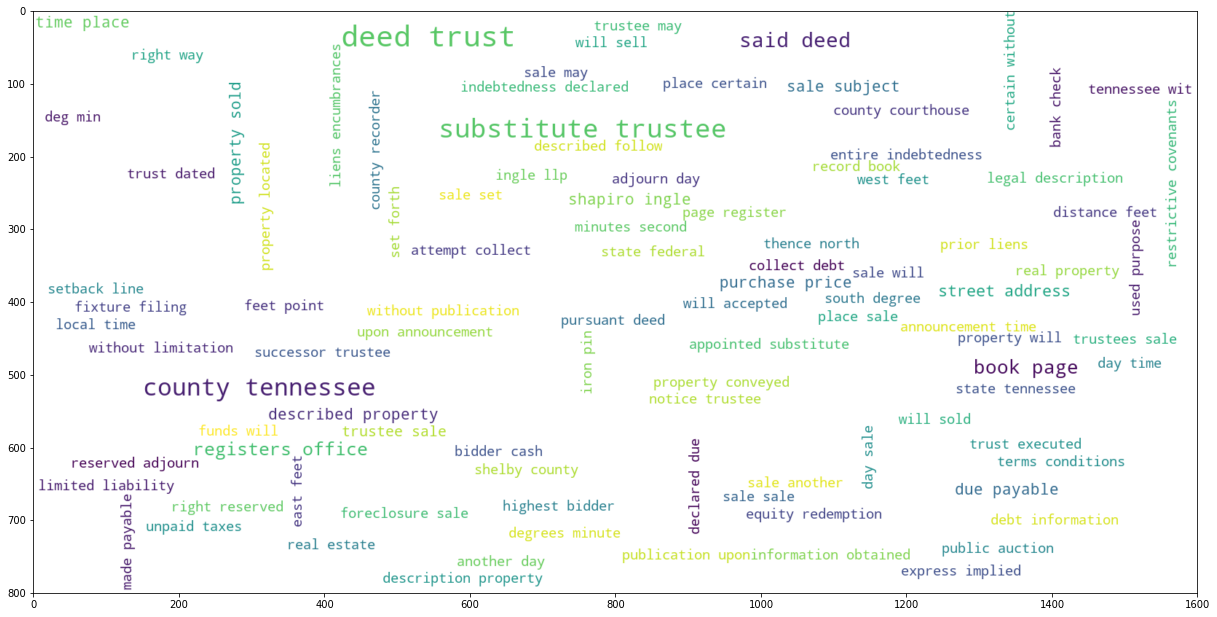

In [113]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

plt.figure()
gs = plt.GridSpec(3, 3)

cnt = 100
for n in range(9):
    df_temp = df[(df['word_cnt']>cnt-100) & (df['word_cnt']<cnt)]
    cnt += 100
    text = data_clean(df_temp.content.tolist())
    wordcloud = WordCloud(width=1600, 
                          height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=40, 
                          random_state=42
                          ).generate(str(text))

    #mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
    #mpl.rcParams['font.size']=12                #10 
    #mpl.rcParams['savefig.dpi']=3000             #72 
    #mpl.rcParams['figure.subplot.bottom']=.1 
    i = n%3
    j = n//3
    plt.figure(figsize=(50,30))
    plt.subplot(gs[j,i])
    #plt.plot(data[n][0], data[n][1])
    #plt.title(data[n][2])
    plt.imshow(wordcloud, interpolation='bilinear')
    
plt.tight_layout()
plt.show()

In [122]:
df['first_5'] = df.content.str.split().str[:10]

In [123]:
df.first_5.head()

320471    [NOTICE, (for, publication), ARTICLES, OF, ORG...
428137    [ADVERTISEMENT, FOR, BIDS, FOR, FRONTIER, MIDD...
171469    [NOTICE, OF, SALE, APN:, 177-21-310-169, Order...
486209    [NO., CV2017-00580, SUMMONS, IN, THE, SUPERIOR...
227894    [0002131718, PUBLIC, NOTICE, The, following, v...
Name: first_5, dtype: object

(-0.5, 1599.5, 799.5, -0.5)

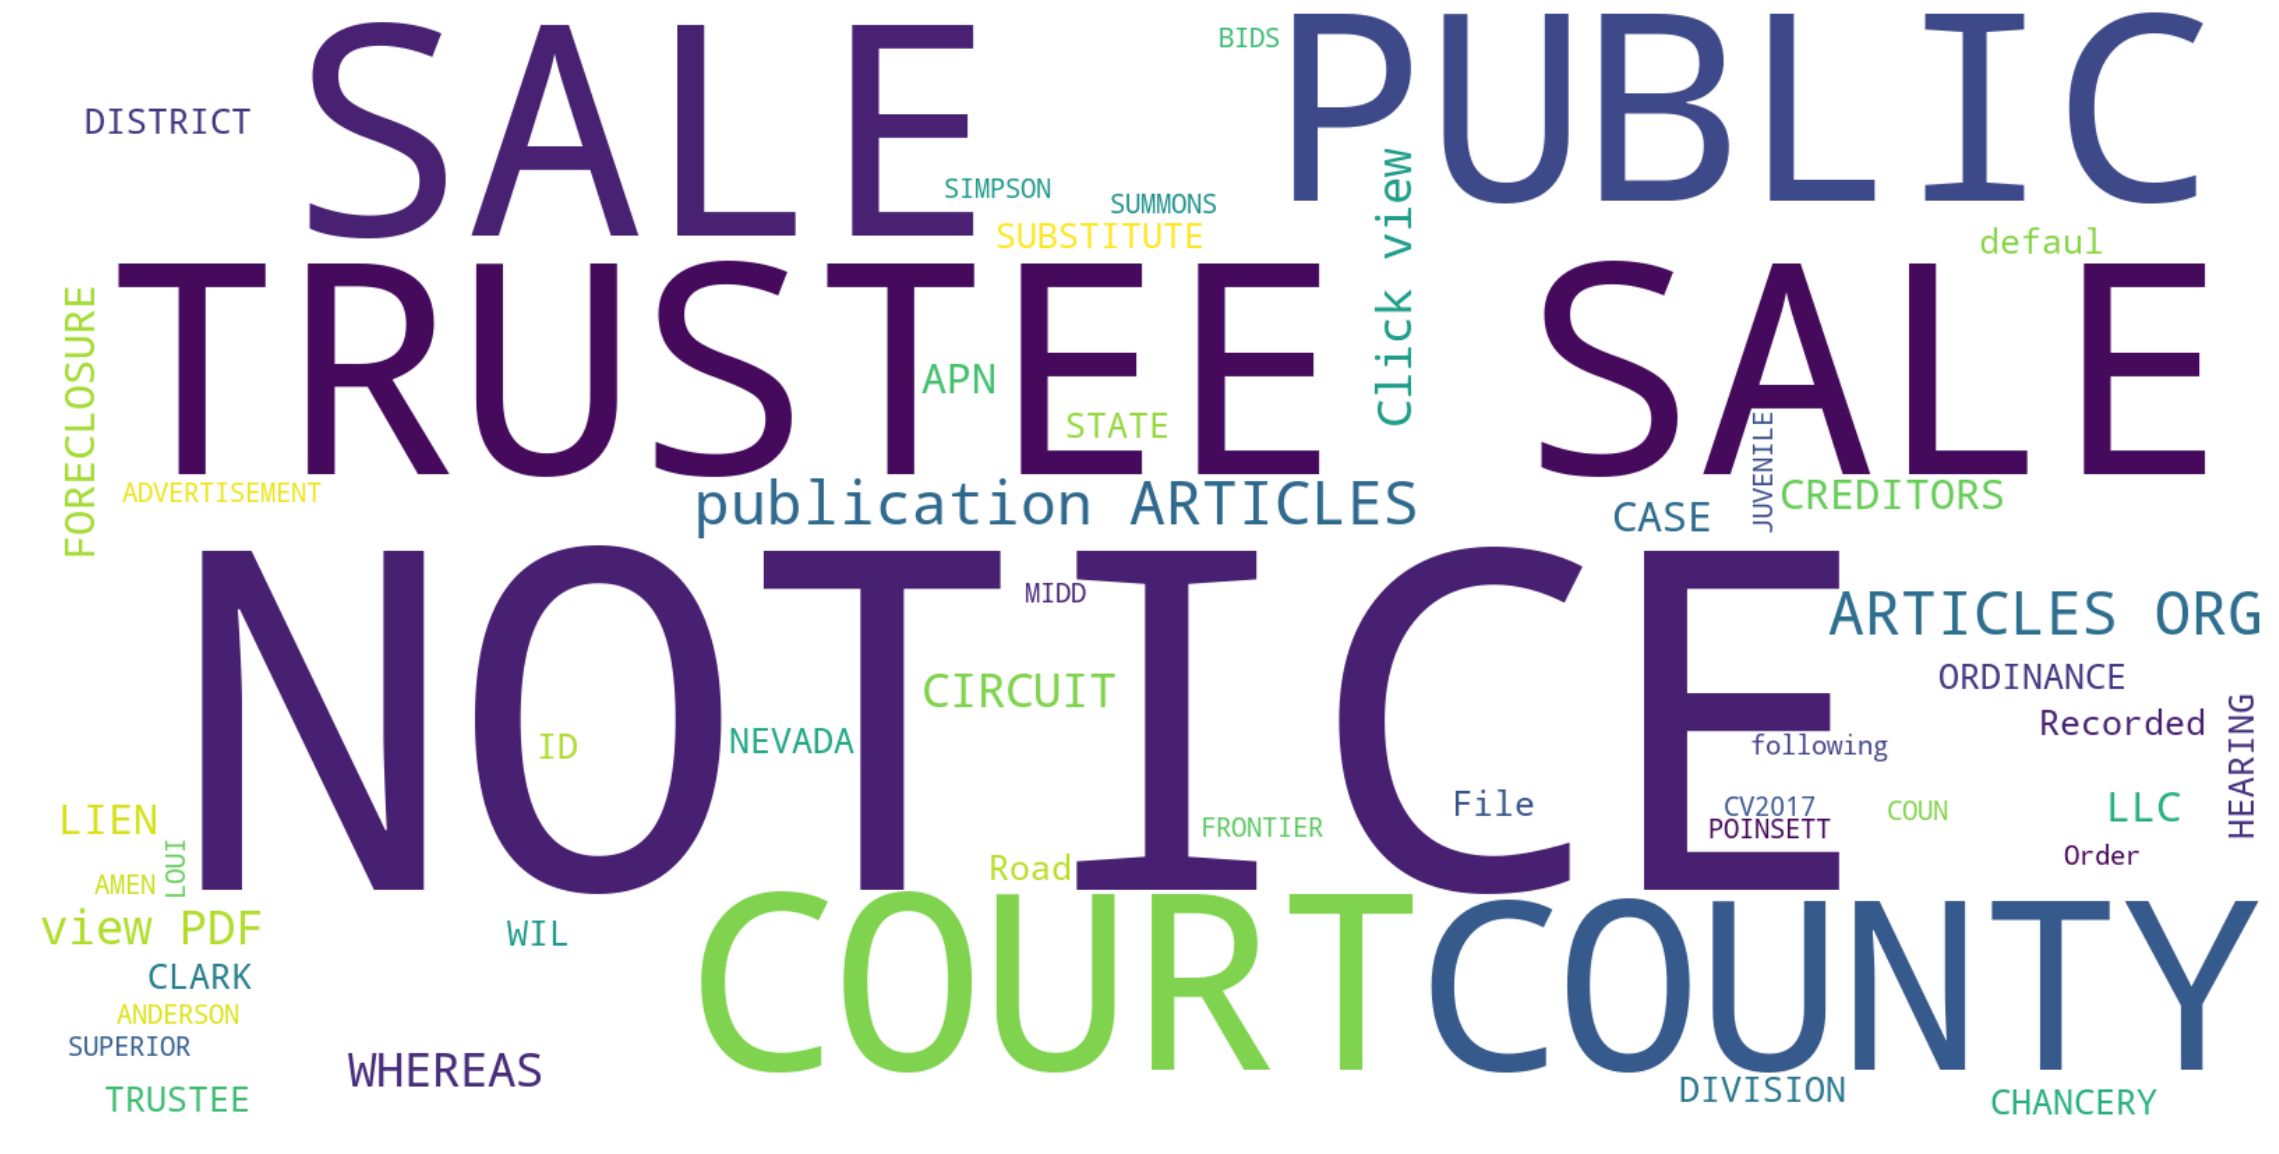

In [124]:
# the matplotlib way:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

#wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords)
#wordcloud.generate_from_frequencies(frequencies=word_freq)
text = df.first_5
wordcloud = WordCloud(width=1600, 
                      height=800,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=50,
                      random_state=42
                      ).generate(str(text))

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")